In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

import time
import operator


# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings('ignore')

### MovieLens 데이터 살펴보기

In [2]:
rating_data = pd.io.parsers.read_csv('data10/ml-1m/ratings.dat',
                        names=['user_id', 'movie_id', 'rating', 'time'],
                        delimiter='::')

rating_data


,user_id,movie_id,rating,time
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [3]:
movie_data = pd.io.parsers.read_csv('data10/ml-1m/movies.dat',
                            names=['movie_id', 'title', 'genre'],
                            delimiter='::')
movie_data

,movie_id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [4]:
user_data = pd.io.parsers.read_csv('data10/ml-1m/users.dat',
                names=['user_id', 'gender', 'age', 'occupation', 'zipcode'],
                delimiter='::')
user_data

,user_id,gender,age,occupation,zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [5]:
rating_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column    Non-Null Count    Dtype
---  ------    --------------    -----
 0   user_id   1000209 non-null  int64
 1   movie_id  1000209 non-null  int64
 2   rating    1000209 non-null  int64
 3   time      1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [6]:
movie_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  3883 non-null   int64 
 1   title     3883 non-null   object
 2   genre     3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [7]:
user_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     6040 non-null   int64 
 1   gender      6040 non-null   object
 2   age         6040 non-null   int64 
 3   occupation  6040 non-null   int64 
 4   zipcode     6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [8]:
rating_data.isna().sum()

user_id     0
movie_id    0
rating      0
time        0
dtype: int64

In [9]:
movie_data.isna().sum()


movie_id    0
title       0
genre       0
dtype: int64

In [10]:
user_data.isna().sum()


user_id       0
gender        0
age           0
occupation    0
zipcode       0
dtype: int64

## 데이터 분석

### 분석할 영화의 정보 탐색하기

In [11]:
# 전체 영화 데이터 로우의 개수
print(f'전제 영화 데이터 로우의 개수 : {len(movie_data)}')
# movie_id가 중복된 것을 제거한 개수
print(f'중복 제외한 영화의 개수 : {len(movie_data["movie_id"].unique())}')

전제 영화 데이터 로우의 개수 : 3883
중복 제외한 영화의 개수 : 3883


In [18]:
# 년도별 영화 수를 가져온다.
movie_data['year'] = movie_data['title'].apply(lambda x : x[-5:-1] )
movie_data['year'].value_counts().sort_index()

1919      3
1920      2
1921      1
1922      2
1923      3
       ... 
1996    345
1997    315
1998    337
1999    283
2000    156
Name: year, Length: 81, dtype: int64

In [19]:
# 각 영화의 연대별 갯수를 가져오세요.
# 연대별 년도값을 담을 컬럼의 이름은 year_term
# 1910, 1920, 1930....

In [22]:
movie_data['year_term'] = movie_data['title'].apply(lambda x : x[-5:-2] + '0' )
movie_year_term= movie_data['year_term'].value_counts().sort_index()
print(movie_year_term)

1910       3
1920      34
1930      77
1940     126
1950     168
1960     191
1970     247
1980     598
1990    2283
2000     156
Name: year_term, dtype: int64


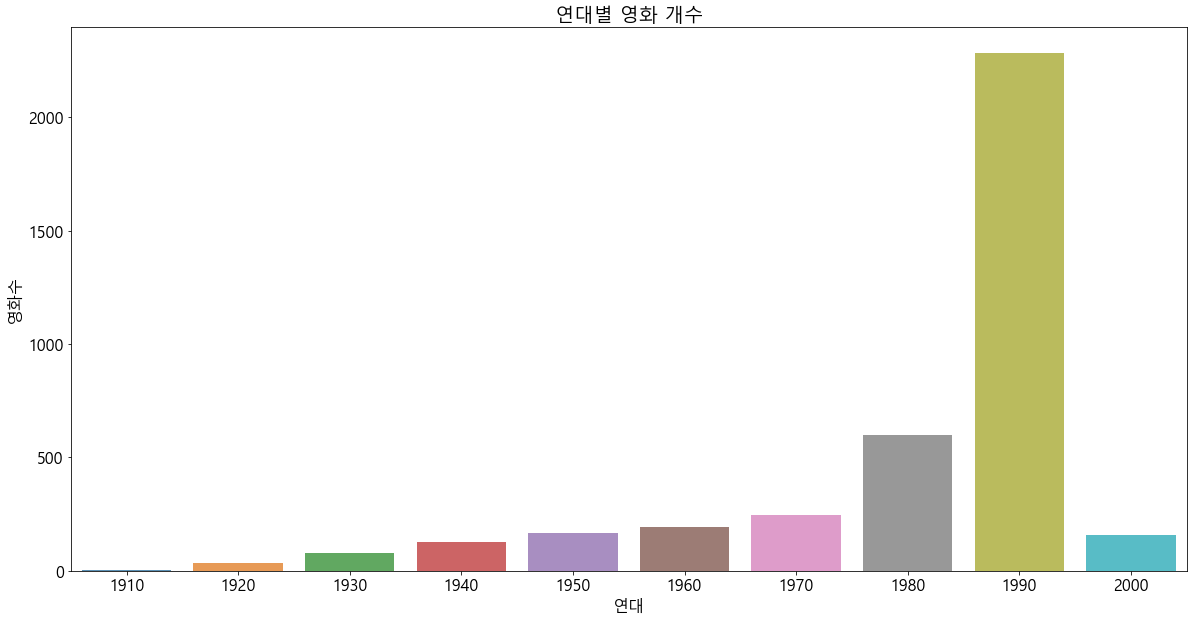

In [23]:
sns.barplot(movie_year_term.index, movie_year_term.values, alpha=0.8)
plt.title('연대별 영화 개수')
plt.xlabel('연대')
plt.ylabel('영화수')
plt.show()

## 장르별 속성 탐색

In [24]:
# 가장 많이 사용된 장르의 조합을 출력한다.
movie_data['genre'].value_counts()

Drama                                            843
Comedy                                           521
Horror                                           178
Comedy|Drama                                     162
Comedy|Romance                                   142
                                                ... 
Adventure|Animation|Children's|Comedy|Musical      1
Romance|Western                                    1
Mystery|Sci-Fi|Thriller                            1
Sci-Fi|War                                         1
Adventure|Fantasy                                  1
Name: genre, Length: 301, dtype: int64

In [28]:
# 가장 많이 등장한 장르의 속성을 추출한다.
# 장르들을 담을 딕셔너리
unique_genre_dict = {}

# 영화의 수 만큼 반복하면서 장르를 추출한다.
for row in movie_data['genre'] :
    # print(row)
    # | 를 기준으로 문자열을 잘라준다.
    parsed_genre = row.split('|')
    # print(parsed_genre)
    for genre_name in parsed_genre :
        # print(genre_name)
        # 해당 장르로 저장된 것이 없다면..
        if unique_genre_dict.get(genre_name) == None :
            unique_genre_dict[genre_name] = 1
        # 해당 장르로 저장된 것이 있다면..
        else :
            unique_genre_dict[genre_name] = unique_genre_dict[genre_name] + 1

print(unique_genre_dict)

{'Animation': 105, "Children's": 251, 'Comedy': 1200, 'Adventure': 283, 'Fantasy': 68, 'Romance': 471, 'Drama': 1603, 'Action': 503, 'Crime': 211, 'Thriller': 492, 'Horror': 343, 'Sci-Fi': 276, 'Documentary': 127, 'War': 143, 'Musical': 114, 'Mystery': 106, 'Film-Noir': 44, 'Western': 68}


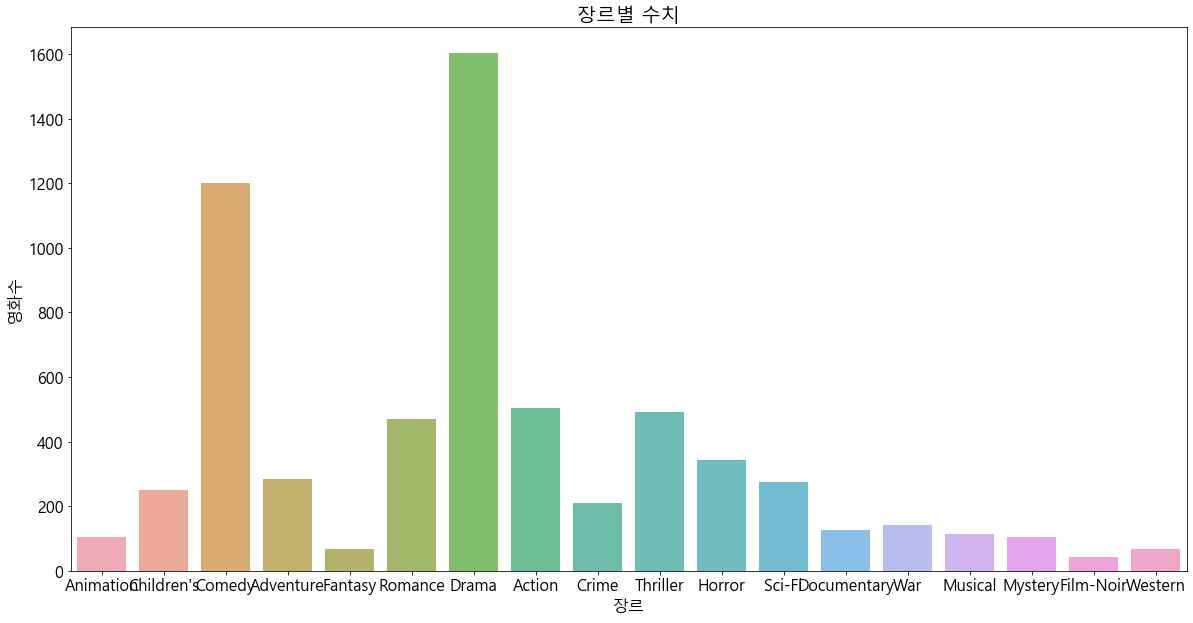

In [29]:
# 장르의 속성을 그래프로 그린다.
sns.barplot(list(unique_genre_dict.keys()), list(unique_genre_dict.values()), alpha=0.8)
plt.title('장르별 수치')
plt.ylabel('영화수')
plt.xlabel('장르')
plt.show()

### 전체 사용자 수를 파악한다.

In [32]:
print(f'사용자 전체 로우의 수 : {len(user_data)}')
print(f'중복 제외한 사용자의 수 : {len(user_data["user_id"].unique())}')

사용자 전체 로우의 수 : 6040
중복 제외한 사용자의 수 : 6040


### 사용자의 성별 별 수를 그래프로 시각화한다.

In [42]:
user_count = user_data['gender'].value_counts()
user_count 

M    4331
F    1709
Name: gender, dtype: int64

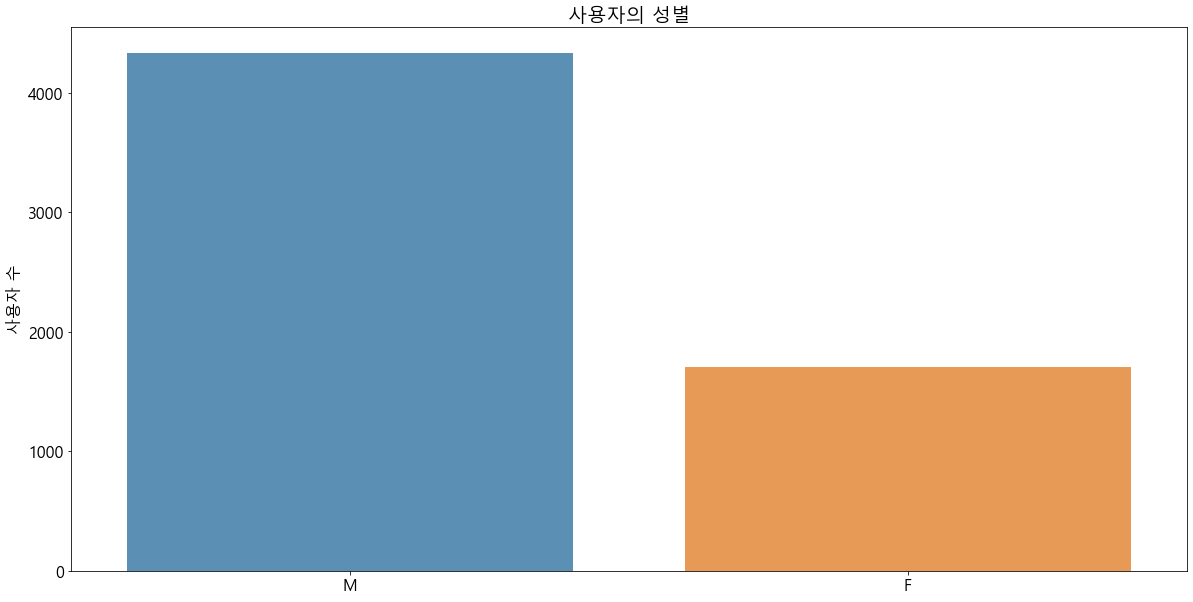

In [83]:
sns.barplot(user_count.index , user_count.values, alpha = 0.8)
plt.title('사용자의 성별')
plt.ylabel('사용자 수')
plt.show()

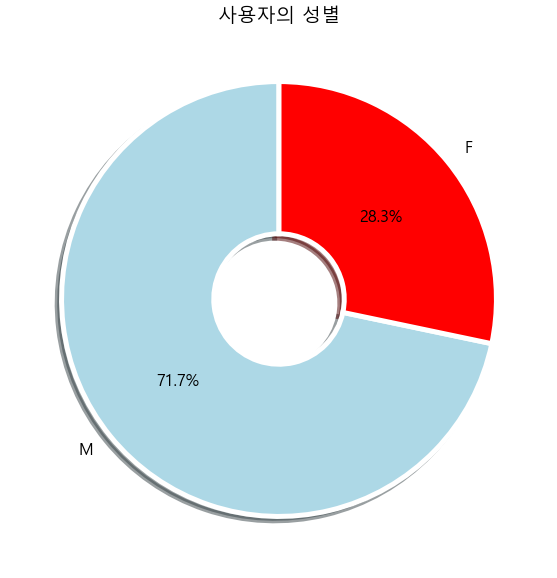

In [81]:
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.pie(user_count, labels=user_count.index, shadow=True,  autopct='%.1f%%',startangle=90, colors=['lightblue','red'],
       wedgeprops=wedgeprops)
plt.title('사용자의 성별')
plt.show()

In [78]:
# 성별 별 사용자 수를 가져온다.
user_gender = user_data['gender'].value_counts()
user_gender

M    4331
F    1709
Name: gender, dtype: int64

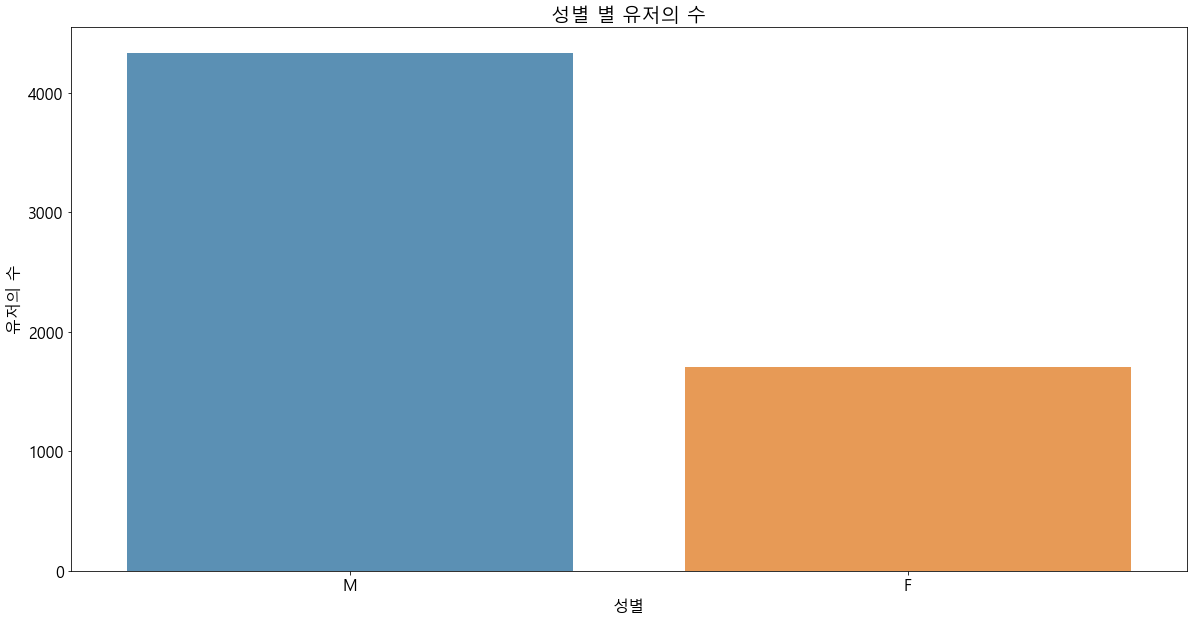

In [82]:
sns.barplot(user_gender.index, user_gender.values, alpha=0.8)
plt.title('성별 별 유저의 수')
plt.xlabel('성별')
plt.ylabel('유저의 수')
plt.show()


### 연령대별(10대,20대,30대) 사용자 수를 그래프로 시각화한다.
- 9세 이하는 outlier로 취급한다.
- 10 ~ 19세는 10,  20~29세는 20 ...

In [84]:
#age 컬럼이 숫자인지 확인한다.
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     6040 non-null   int64 
 1   gender      6040 non-null   object
 2   age         6040 non-null   int64 
 3   occupation  6040 non-null   int64 
 4   zipcode     6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [87]:
def age_classification(age) :
    if age< 10 :
        return 'outlier'
    else :
        return str(age // 10 * 10)
    
user_data['ages'] = user_data['age'].apply(lambda x : age_classification(x))
user_data['ages']

0       outlier
1            50
2            20
3            40
4            20
         ...   
6035         20
6036         40
6037         50
6038         40
6039         20
Name: ages, Length: 6040, dtype: object

In [93]:
# 연령대별 유저 수를 구한다
user_sort = user_data['ages'].value_counts().sort_index()
user_sort

10         1103
20         2096
30         1193
40          550
50          876
outlier     222
Name: ages, dtype: int64

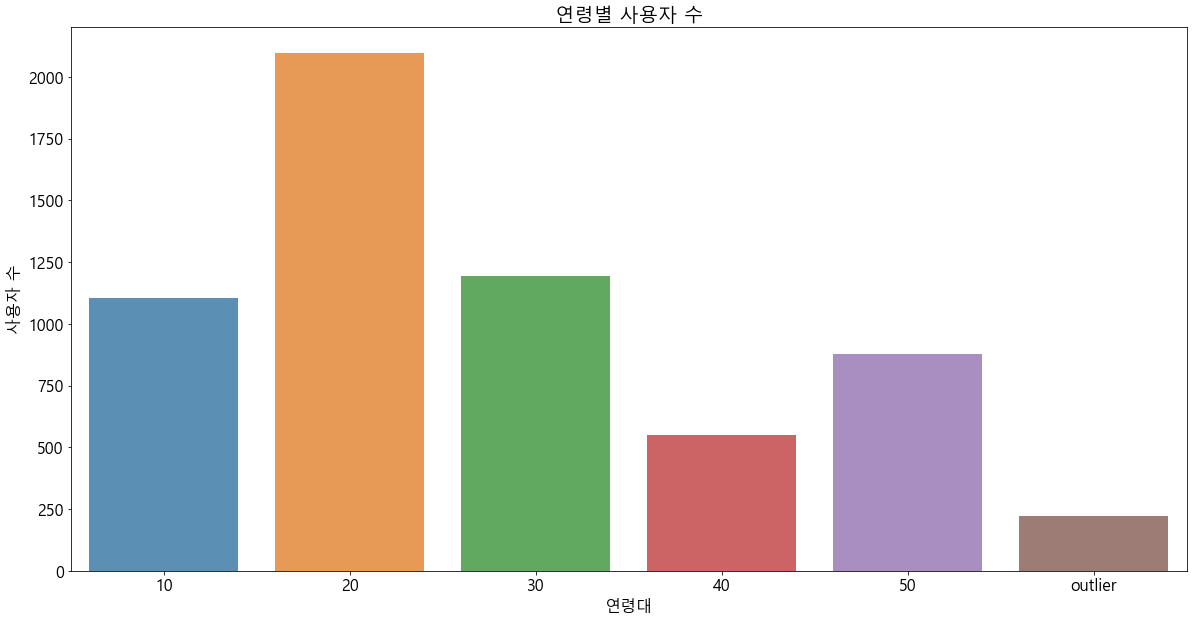

In [95]:
sns.barplot(user_sort.index, user_sort.values, alpha=0.8)
plt.title('연령별 사용자 수')
plt.ylabel('사용자 수')
plt.xlabel('연령대')
plt.show()

## 각 영화들이 평가받은 횟수를 탐색한다.

In [103]:
rating_data

,user_id,movie_id,rating,time
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [99]:
movie_rate_count = rating_data.groupby('movie_id')['rating'].count().values
movie_rate_count

array([2077,  701,  478, ...,   54,   40,  388], dtype=int64)

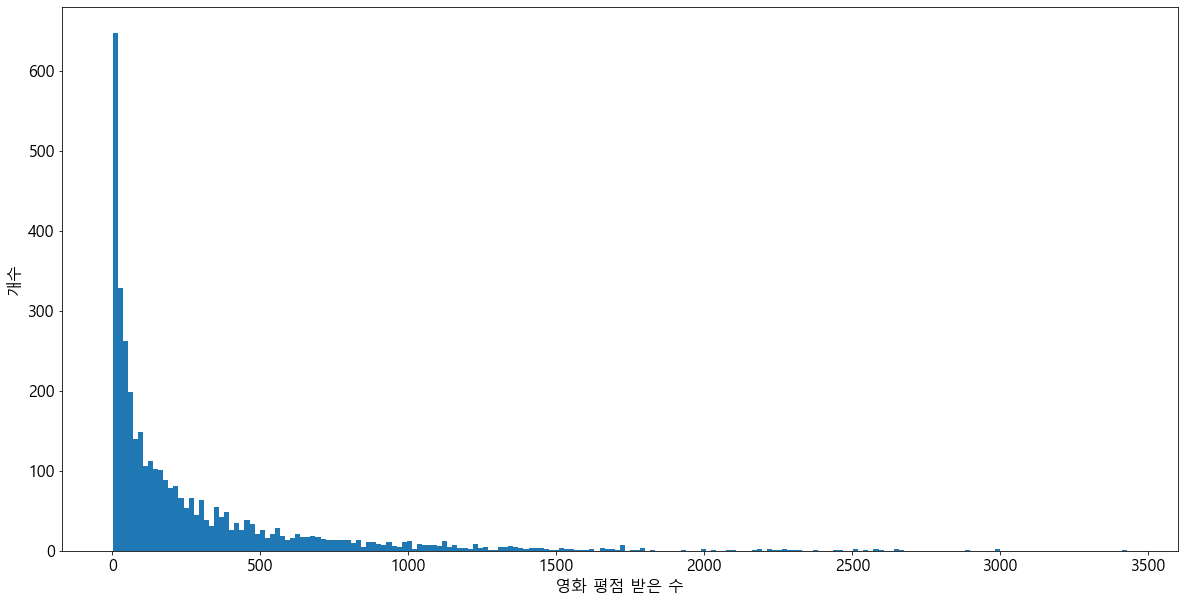

In [102]:
plt.hist(movie_rate_count, bins=200)
plt.ylabel('개수')
plt.xlabel('영화 평점 받은 수')

plt.show()

In [104]:
# 전체 영화 수
print(f'전체 영화 수 : {len(movie_data)}')
# 평가를 100 미만으로 받은 영화 수
print(f'평가를 100개 미만 받은 영화 수 : {len(movie_rate_count[movie_rate_count < 100])}')

전체 영화 수 : 3883
평가를 100개 미만 받은 영화 수 : 1687


In [106]:
# 영화별 평균 평점을 가져온다.
movie_grouped_rating_info = rating_data.groupby('movie_id')['rating'].agg(['count', 'mean'])
movie_grouped_rating_info.columns = ['rated_count', 'rating_mean']
movie_grouped_rating_info


,rated_count,rating_mean
movie_id,,
1,2077,4.146846
2,701,3.201141
3,478,3.016736
4,170,2.729412
5,296,3.006757
...,...,...
3948,862,3.635731
3949,304,4.115132
3950,54,3.666667


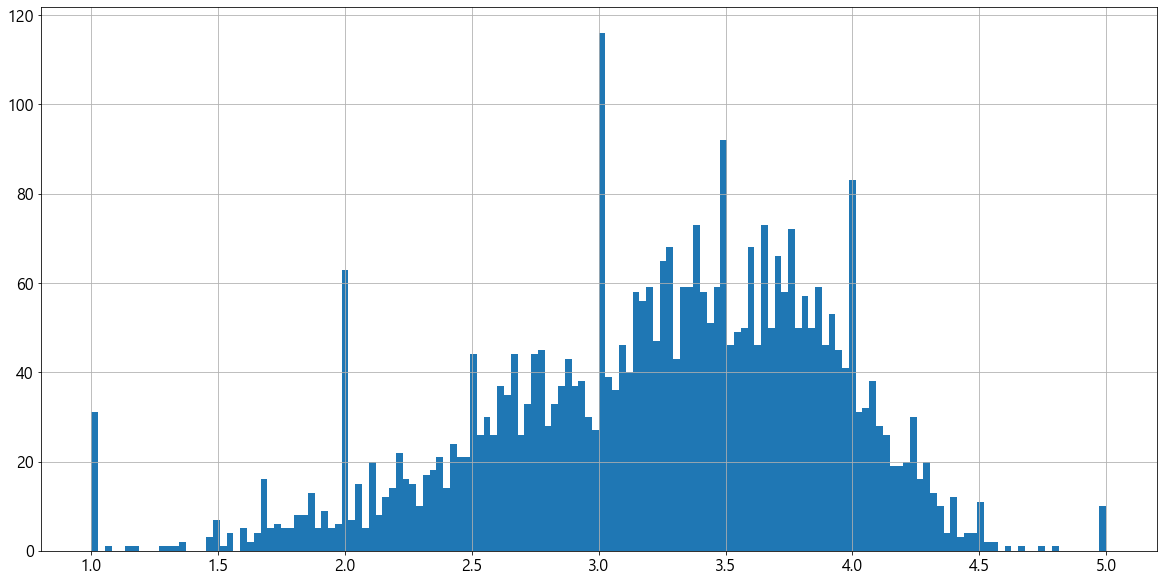

In [107]:
movie_grouped_rating_info['rating_mean'].hist(bins=150)
plt.show()


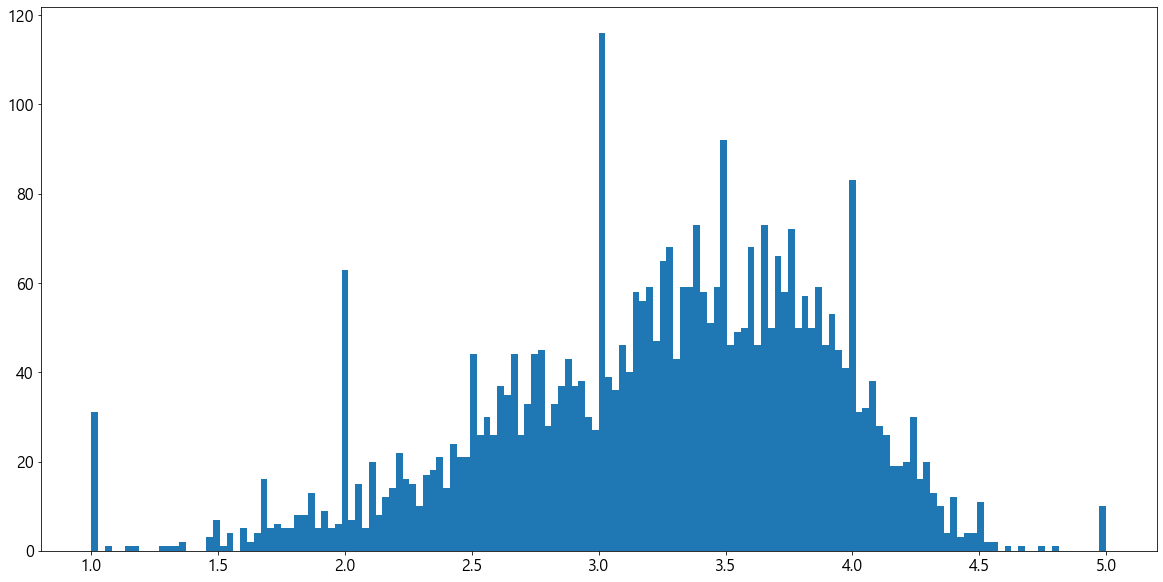

In [108]:
movie_grouped_rating_info['rating_mean'].hist(bins=150, grid=False)
plt.show()


In [109]:
# 100번 이상의 평가를 받은 영화 중, 평점이 높은 10개의 영화를 가져온다.
# 평점 평균 정보와 영화 정보를 합친다.
# on : 지정된 컬럼의 값이 같은 것 끼리만 가져온다.
# how : left, right. 결측치로 셋팅할 데이터프레임 지정
a1= movie_grouped_rating_info.merge(movie_data, on=['movie_id'], how='left')
a1


,movie_id,rated_count,rating_mean,title,genre,year,year_term
0,1,2077,4.146846,Toy Story (1995),Animation|Children's|Comedy,1995,1990
1,2,701,3.201141,Jumanji (1995),Adventure|Children's|Fantasy,1995,1990
2,3,478,3.016736,Grumpier Old Men (1995),Comedy|Romance,1995,1990
3,4,170,2.729412,Waiting to Exhale (1995),Comedy|Drama,1995,1990
4,5,296,3.006757,Father of the Bride Part II (1995),Comedy,1995,1990
...,...,...,...,...,...,...,...
3701,3948,862,3.635731,Meet the Parents (2000),Comedy,2000,2000
3702,3949,304,4.115132,Requiem for a Dream (2000),Drama,2000,2000
3703,3950,54,3.666667,Tigerland (2000),Drama,2000,2000
3704,3951,40,3.900000,Two Family House (2000),Drama,2000,2000


In [110]:
# 평가를 받은 횟수가 100 이상인 영화 정보를 가져온다.
a2 = a1.query('rated_count >= 100')
a2

,movie_id,rated_count,rating_mean,title,genre,year,year_term
0,1,2077,4.146846,Toy Story (1995),Animation|Children's|Comedy,1995,1990
1,2,701,3.201141,Jumanji (1995),Adventure|Children's|Fantasy,1995,1990
2,3,478,3.016736,Grumpier Old Men (1995),Comedy|Romance,1995,1990
3,4,170,2.729412,Waiting to Exhale (1995),Comedy|Drama,1995,1990
4,5,296,3.006757,Father of the Bride Part II (1995),Comedy,1995,1990
...,...,...,...,...,...,...,...
3690,3937,135,2.940741,Runaway (1984),Sci-Fi|Thriller,1984,1980
3699,3946,100,2.260000,Get Carter (2000),Action|Drama|Thriller,2000,2000
3701,3948,862,3.635731,Meet the Parents (2000),Comedy,2000,2000
3702,3949,304,4.115132,Requiem for a Dream (2000),Drama,2000,2000


In [119]:
# 평균평점과 영화 제목을 가져온다.
a3 = a2.sort_values('rating_mean', ascending=False)
a3[['rating_mean','title']].head(10)

,rating_mean,title
1839,4.560510,Seven Samurai (The Magnificent Seven) (Shichin...
309,4.554558,"Shawshank Redemption, The (1994)"
802,4.524966,"Godfather, The (1972)"
708,4.520548,"Close Shave, A (1995)"
49,4.517106,"Usual Suspects, The (1995)"
513,4.510417,Schindler's List (1993)
1066,4.507937,"Wrong Trousers, The (1993)"
861,4.491489,Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)
1108,4.477725,Raiders of the Lost Ark (1981)
843,4.476190,Rear Window (1954)


### 실습예제
- 위에서 한것과 동일한 방법으로
- 유저별로 평가한 영화 개수
- 유저별로 평가한 평균 영화 점수
- 유저별로 평가한 영화 점수의 편차

In [134]:
a1 = rating_data.groupby('user_id').count()
a1[['movie_id']]

,movie_id
user_id,
1,53
2,129
3,51
4,21
5,198
...,...
6036,888
6037,202
6038,20


In [130]:
rating_data

,user_id,movie_id,rating,time
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [133]:
a1 = rating_data.groupby('user_id').mean()[['rating']]
a1.sort_values(by='rating', ascending= False)

,rating
user_id,
283,4.962963
2339,4.956522
3324,4.904762
3902,4.890909
446,4.843137
...,...
5850,1.844828
4539,1.815126
2744,1.304348
